In [560]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


plot_figsize = (10,5)
plot_xlim = [-15, 115]
plot_ylim = [-20, 50]

In [561]:
from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Admission_Predict.csv')

In [562]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [563]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [564]:
df.shape

(400, 9)

In [565]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [566]:
df['Chance of Admit '].max()

0.97

In [567]:
df['Chance of Admit '].min()

0.34

In [568]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [569]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [570]:
df.isna().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

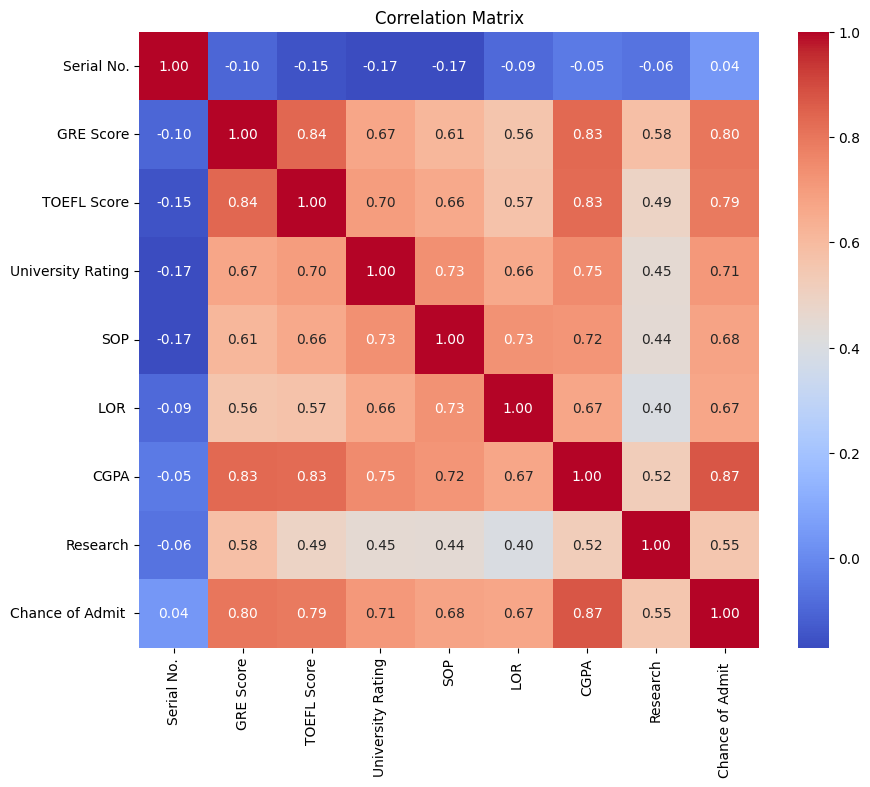

In [571]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [572]:
#x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
#       'LOR ', 'CGPA']]
#y = df['Chance of Admit ']

X = df.drop(['Serial No.', 'Research', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [573]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


In [574]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

In [575]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
191,323,110,5,4.0,5.0,8.98
383,300,100,3,3.0,3.5,8.26
43,332,117,4,4.5,4.0,9.10
348,302,99,1,2.0,2.0,7.25
370,310,103,2,2.5,2.5,8.24
...,...,...,...,...,...,...
342,308,106,3,3.0,3.0,8.24
343,305,103,2,2.5,3.5,8.13
230,313,104,3,4.0,4.5,8.65
397,330,116,4,5.0,4.5,9.45


In [576]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [577]:
reg_lin = linear_model.LinearRegression()

reg_lin.fit(X_train_scaled, y_train)

y_predict = reg_lin.predict(X_test_scaled)

In [578]:
y_predict

array([0.66703986, 0.70880847, 0.91986787, 0.52147631, 0.98680347,
       0.59362831, 0.76710903, 0.52313514, 0.72896695, 0.72474235,
       0.90352559, 0.71115282, 0.53273793, 0.68178226, 0.71892129,
       0.58619063, 0.95075225, 0.62669752, 0.70497225, 0.62877898,
       0.84287433, 0.66812757, 0.81203101, 0.87196638, 0.73029795,
       0.73729622, 0.88048703, 0.60991577, 0.60488043, 0.79133908,
       0.74679514, 0.92942113, 0.79970711, 0.55116759, 0.68118449,
       0.7637157 , 0.49796316, 0.80591253, 0.83458306, 0.65774493,
       0.61424459, 0.7039392 , 0.80224046, 0.58138855, 0.90484044,
       0.79830736, 0.74317947, 0.70882562, 0.84869955, 0.93087962,
       0.58477684, 0.73455697, 0.79418746, 0.65945413, 0.68930117,
       0.55199034, 0.61857959, 0.85343126, 0.95924909, 0.63898424,
       0.46642383, 0.85305353, 0.89906557, 0.76937289, 0.87837399,
       0.80315583, 0.65051783, 0.70019524, 0.88068719, 0.6965253 ,
       0.85824449, 0.708661  , 0.62730449, 0.69080518, 0.69303

In [579]:
y_predict = y_predict.round(2)

In [580]:
pd.DataFrame([y_predict, y_test]).transpose().head(20)

,0,1
0,0.67,0.73
1,0.71,0.70
2,0.92,0.94
3,0.52,0.69
4,0.99,0.97
5,0.59,0.48
6,0.77,0.80
7,0.52,0.54
8,0.73,0.73
9,0.72,0.71


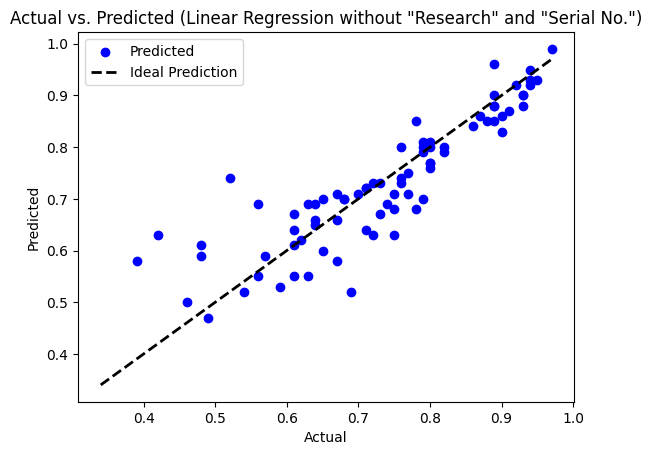

In [581]:
plt.scatter(y_test, y_predict, color='blue', label='Predicted')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Linear Regression without "Research" and "Serial No.")')
plt.legend()
plt.show()

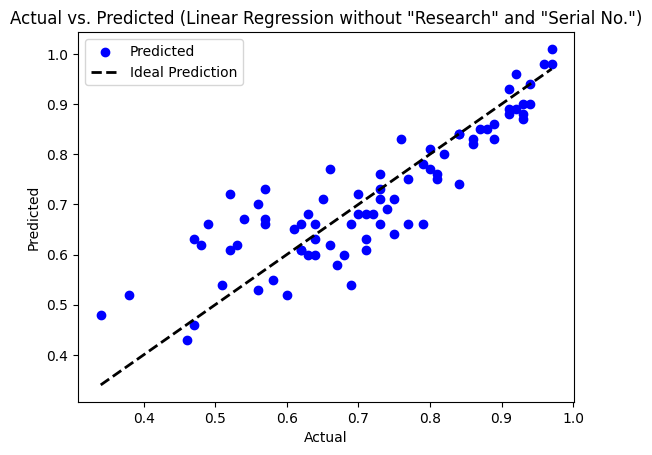

In [582]:
X = df.drop(['Serial No.', 'Research','University Rating', 'SOP',
       'LOR ', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

y_test_actual = y_test
X_test_actual = X_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg_lin = linear_model.LinearRegression()

reg_lin.fit(X_train_scaled, y_train)

y_predict = reg_lin.predict(X_test_scaled)

y_predict = y_predict.round(2)

plt.scatter(y_test, y_predict, color='blue', label='Predicted')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Linear Regression without "Research" and "Serial No.")')
plt.legend()
plt.show()

In [583]:
pd.DataFrame([y_predict, y_test]).transpose().head(20)

,0,1
0,0.62,0.66
1,0.62,0.53
2,0.62,0.48
3,0.90,0.93
4,0.89,0.92
5,0.76,0.81
6,0.85,0.88
7,0.52,0.60
8,0.86,0.89
9,0.55,0.58


In [584]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [585]:
y_pred = clf.predict(X_test)

In [586]:
reg_dt = tree.DecisionTreeRegressor(max_depth=20)

reg_dt.fit(X_train, y_train)

y_predict_tree = reg_dt.predict(X_test)

plt.figure(figsize=(300,30))
tree.plot_tree(reg_dt, max_depth=5, fontsize=10)

[Text(0.5013297872340425, 0.9285714285714286, 'x[2] <= 8.645\nsquared_error = 0.021\nsamples = 320\nvalue = 0.725'),
 Text(0.2699468085106383, 0.7857142857142857, 'x[2] <= 7.97\nsquared_error = 0.012\nsamples = 162\nvalue = 0.621'),
 Text(0.1356382978723404, 0.6428571428571429, 'x[2] <= 7.665\nsquared_error = 0.009\nsamples = 46\nvalue = 0.518'),
 Text(0.0797872340425532, 0.5, 'x[0] <= 307.0\nsquared_error = 0.008\nsamples = 26\nvalue = 0.478'),
 Text(0.0425531914893617, 0.35714285714285715, 'x[2] <= 7.655\nsquared_error = 0.005\nsamples = 20\nvalue = 0.456'),
 Text(0.02127659574468085, 0.21428571428571427, 'x[0] <= 301.0\nsquared_error = 0.004\nsamples = 17\nvalue = 0.47'),
 Text(0.010638297872340425, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.031914893617021274, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.06382978723404255, 0.21428571428571427, 'x[1] <= 98.0\nsquared_error = 0.0\nsamples = 3\nvalue = 0.373'),
 Text(0.05319148936170213, 0.07142857142857142, '\n  (...)  \n'),
 T

In [658]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

y_test = y_test.to_numpy()
print(type(y_test))
print(type(y_predict))
reg_dt.fit(X_train, y_train)

accuracy = clf.score(X_test,y_test)
accuracy = accuracy.round(2)
print(f"Random Forest Accuracy: {accuracy}")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Random Forest Accuracy: 0.95
